In [3]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [230]:
p=Path("./data")
dirs=p.glob("*")
folder_dir=[]
for f_dir in dirs:
    
    folder_dir.append((str(f_dir).split("/")[-1]))
label_dict=dict((name,i) for i,name in enumerate(folder_dir))
name_dict=dict((i,name) for i,name in enumerate(folder_dir))
print(label_dict)
print(name_dict)

{'Charizard': 0, 'Squirtle': 1, 'Pikachu': 2, 'Bulbasaur': 3}
{0: 'Charizard', 1: 'Squirtle', 2: 'Pikachu', 3: 'Bulbasaur'}


In [231]:
p=Path("./data")

dirs=p.glob("*")

#for d in dirs:
    #print(d)

image_data=[]
labels=[]

#optional
image_paths=[]

for folder_dir in dirs:
    cnt=0
    label=((str(folder_dir).split("/")[-1]))
    print(label)
    #iterate over folder_dir and pick all images of the pokemeon
    
    for img_path in folder_dir.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(40,40))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        
        labels.append(label_dict[label])
        cnt+=1
    print(cnt)

Charizard
52
Squirtle
186
Pikachu
199
Bulbasaur
174


In [232]:
#visualisation
import numpy as np
print(len(image_data))
#print((labels))
print(type(image_data))

611
<class 'list'>


In [233]:
X=np.array(image_data)
Y=np.array(labels)
print(X.shape,"\n",Y.shape)

(611, 40, 40, 3) 
 (611,)


In [234]:
def drawImg(img,label):
    plt.imshow(img)
    print(name_dict[label])
    plt.axis("off")
    plt.show()

Charizard


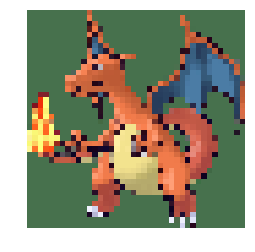

In [235]:
drawImg(X[0]/255.0,labels[0])

Pikachu


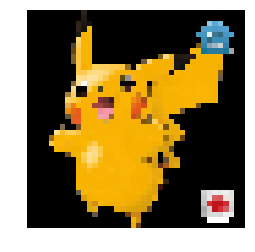

Bulbasaur


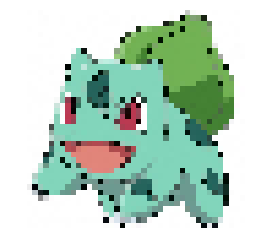

Bulbasaur


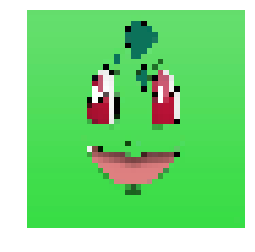

Bulbasaur


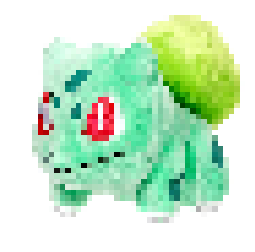

Squirtle


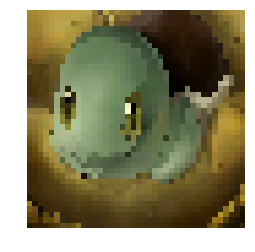

Pikachu


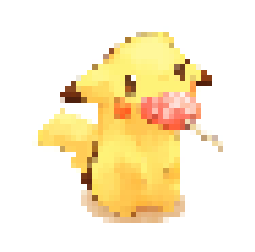

Pikachu


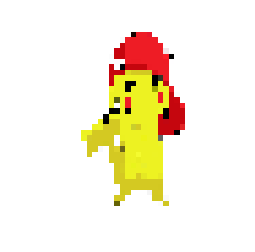

Bulbasaur


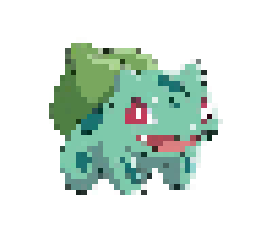

Pikachu


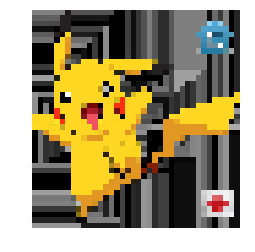

Pikachu


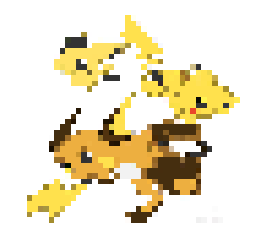

In [236]:
for i in range(10):
    r=np.random.randint(X.shape[0])
    drawImg(X[r]/255.0,Y[r])

In [237]:
##creating training and testing data
split=int(X.shape[0]*.66)

X_=np.array(X)
Y_=np.array(Y)

#training set
X_train=X_[:split,:]
y_train=Y_[:split]

#testing set
X_val=X_[split:,:]
y_val=Y_[split:]

X_train=X_train.reshape(X_train.shape[0],-1)
X_val=X_val.reshape(X_val.shape[0],-1)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(403, 4800) (403,)
(208, 4800) (208,)


In [238]:
IMG_SIZE=4800
H1_SIZE=256
H2_SIZE=64
OUT_SIZE=4

BATCH_SIZE=256
EPOCHS=50
ALPHA=0.003

In [239]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans        

In [240]:

def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [253]:
def Accuracy(X,Y,model):
    outputs=model.predict(X)
    acc=np.sum(outputs==Y).Y.shape[0]
    return acc

In [241]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [249]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=4) #4800 features(40X40X3)

In [250]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

X_val = X_val.reshape(X_val.shape[0],-1)
print(X_val.shape)

(611, 4800)
(208, 4800)


In [251]:
l = train(X,Y,model,500,0.0002)

Epoch 0 Loss 1.8242
Epoch 50 Loss 0.4780
Epoch 100 Loss 0.3294
Epoch 150 Loss 0.2679
Epoch 200 Loss 0.2312
Epoch 250 Loss 0.2065
Epoch 300 Loss 0.1873
Epoch 350 Loss 0.1731
Epoch 400 Loss 0.1618
Epoch 450 Loss 0.1523


In [254]:
from sklearn.metrics import classification_report

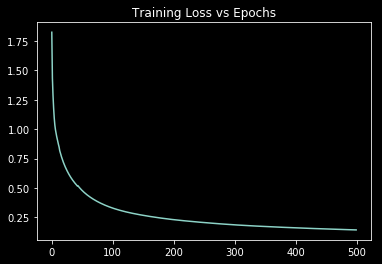

In [256]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [258]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(X_val,y_val,model))

Train Acc 0.8494
Test Acc 0.8510


In [262]:
from sklearn.metrics import confusion_matrix
from visualize import plot_confusion_matrix

In [264]:
outputs=model.predict(X)
cnf_matrix=confusion_matrix(outputs,Y)
print(cnf_matrix)

[[ 40   0   1   1]
 [  4 152   8  20]
 [  8  10 184  10]
 [  0  24   6 143]]


Confusion matrix, without normalization
[[ 40   0   1   1]
 [  4 152   8  20]
 [  8  10 184  10]
 [  0  24   6 143]]


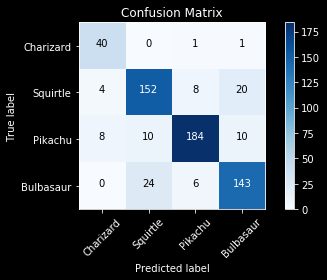

In [265]:
plot_confusion_matrix(cnf_matrix,classes=['Charizard',"Squirtle","Pikachu","Bulbasaur"],title="Confusion Matrix")

In [266]:
from sklearn.metrics import classification_report


In [267]:
print(classification_report(outputs,Y))

             precision    recall  f1-score   support

          0       0.77      0.95      0.85        42
          1       0.82      0.83      0.82       184
          2       0.92      0.87      0.90       212
          3       0.82      0.83      0.82       173

avg / total       0.85      0.85      0.85       611



In [269]:
test_outputs=model.predict(X_val)
print(classification_report(test_outputs,y_val))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00        20
          2       1.00      0.77      0.87        44
          3       0.82      1.00      0.90       143

avg / total       0.78      0.85      0.80       208



/home/anubhav/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [270]:
cnf_matrix=confusion_matrix(test_outputs,y_val)
print(cnf_matrix)

[[  0   0   0   1]
 [  0   0   0  20]
 [  0   0  34  10]
 [  0   0   0 143]]


In [255]:
#training_loss,val_loss,val_acc=main()

Confusion matrix, without normalization
[[  0   0   0   1]
 [  0   0   0  20]
 [  0   0  34  10]
 [  0   0   0 143]]


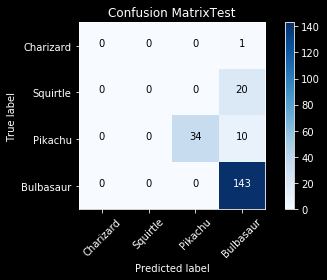

In [271]:
plot_confusion_matrix(cnf_matrix,classes=['Charizard',"Squirtle","Pikachu","Bulbasaur"],title="Confusion MatrixTest")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


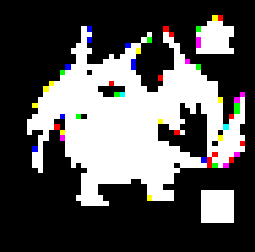

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


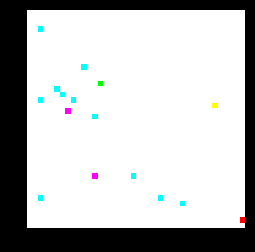

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


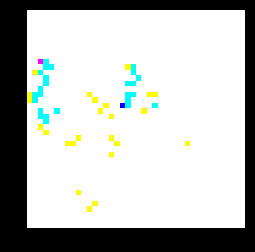

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


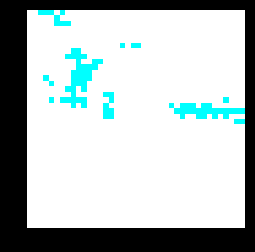

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


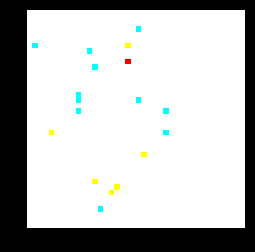

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


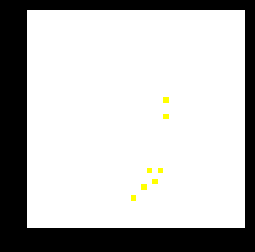

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


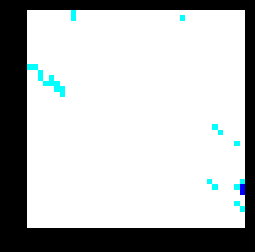

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


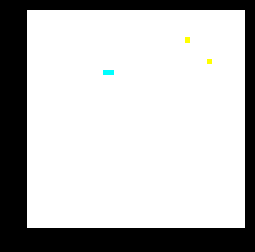

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


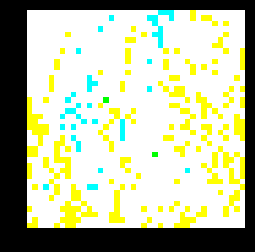

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


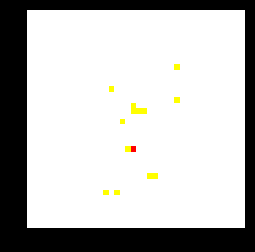

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


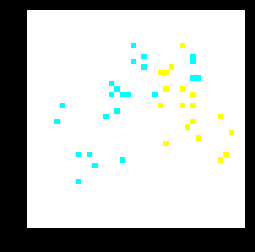

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charizard


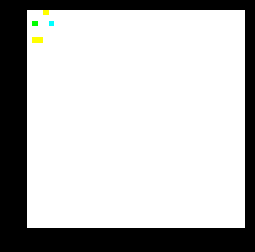

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


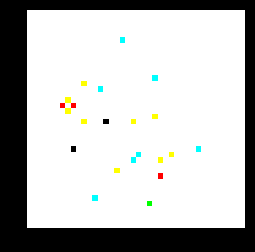

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


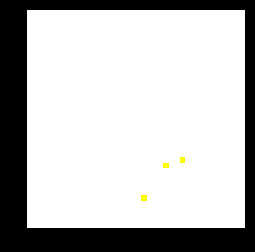

In [ ]:
for i in range(Y.shape[0]):
    if Y[i]!=outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        